In [75]:
import os
os.environ["OMP_NUM_THREADS"] = "20"
os.environ["MKL_NUM_THREADS"] = "20"
os.environ["NUMEXPR_NUM_THREADS"] = "20"
from importlib import reload
import yee_uchie_QM_pml_class
reload(yee_uchie_QM_pml_class)
from yee_uchie_QM_pml_class import Source, Recorder, QM_UCHIE_params, Yee_UCHIE
import QM_update as QM
import numpy as np
import scipy.constants as ct
import time
from scipy.special import hankel2
import matplotlib.pyplot as plt




In [76]:
eps0 = ct.epsilon_0
mu0 = ct.mu_0
hbar = ct.hbar #J⋅s
m = ct.electron_mass*0.15
q = -ct.elementary_charge
c0 = ct.speed_of_light 


Z0 = np.sqrt(mu0/eps0)


In [80]:

########## Fill in the parameters here ################
Nx = 301
Ny = 301
Nt = 100000

dx = 0.25e-10 # m
dy = 0.25e-10 # ms
courant = 0.9 # !Courant number, for stability this should be smaller than 1
dt = courant * 1/(np.sqrt(1/dx**2 + 1/dy**2)*ct.c)

Ly = 3/5*Ny*dy
n = 5 #@ numbers of Subgridding in one grid
N_sub = 15 #@ How much grid you want to take to subgrid

x_sub1 = Nx//3*dx #@ The locationwhere the first subgridding should happen
x_sub2 = 2*Nx//3*dx #@ The locationwhere the first subgridding should happen

QMxpos1 = n*N_sub//2
QMxpos2 = n*N_sub//2


NyQM = int(2*Ny/5)

#create the source
xs = 1/4*Nx*dx
ys = Ny/2*dy
tc = dt*Nt/4
sigma = tc/10
J0 = 1e2/dx/dy
source = Source(xs, ys, J0, tc, sigma)

N = 10e23 #particles/m2
#NyQM = int(2*Ny/3)
order = 'fourth'
omega = 50e14 #[rad/s]
alpha = 0

pml_nl = 20
pml_m = 4



In [81]:
potential = QM.Potential(m,omega, NyQM, dy)
#potential.V()

QMscheme1 = QM.QM(order,NyQM,dy, dt, hbar, m, q, alpha, potential, omega, N)
QMscheme2 = QM.QM(order,NyQM,dy, dt, hbar, m, q, alpha, potential, omega, N)


params = [QM_UCHIE_params(Ly, n, N_sub, x_sub1, QMxpos1, QMscheme1), QM_UCHIE_params(Ly, n, N_sub, x_sub2, QMxpos2, QMscheme2 )]
#params = [QM_UCHIE_params(Ly, n, N_sub, x_sub1, QMxpos1, QMscheme1)]


start_time = time.time()
test = Yee_UCHIE(Nx, Ny, Nt, dx, dy, dt, [source], pml_nl, pml_m, qm_uchie_params = params, coupled = True)
test.calculate_fields()
end_time = time.time()
print("Execution time:", end_time - start_time, "seconds")



  4%|▍         | 4306/100000 [00:10<03:49, 417.53it/s]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "/root/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_11436/2856351392.py", line 14, in <module>
    test.calculate_fields()
  File "/home/josse/Documents/MMM/PROJECT/MMMProject/final/yee_uchie_QM_pml_class.py", line 267, in calculate_fields
    QMw.QMscheme.update(QMw.ey[QMw.QMxpos, slice:-slice],QMw.eymid[QMw.QMxpos, slice:-slice], time_step)
  File "/home/josse/Documents/MMM/PROJECT/MMMProject/final/QM_update.py", line 141, in update
    self.J = self.hbar/(self.m*self.dy)*(self.PsiRe*np.roll(PsiImhalf,-1) - np.roll(self.PsiRe,-1)*PsiImhalf)
                                                    ^^^^^^^^^^^^^^^^^^^^^
  File "<__array_function__ internals>", line 177, in roll
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/root/anaconda3

In [ ]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 75
plt.ioff()
anim = test.animate_field()
from IPython.display import HTML
HTML(anim.to_jshtml())


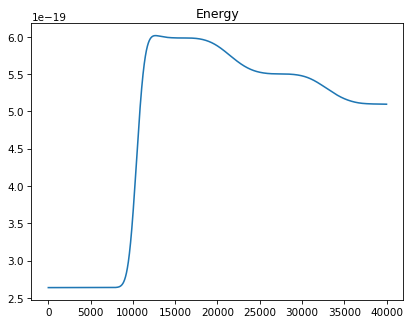

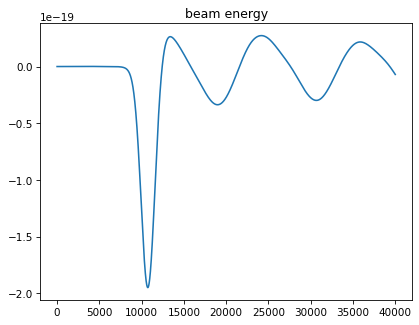

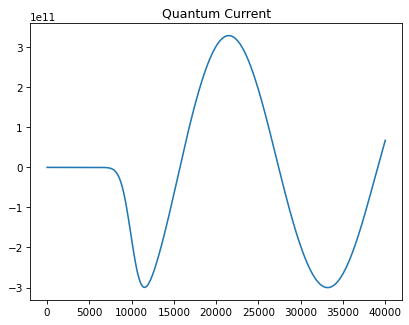

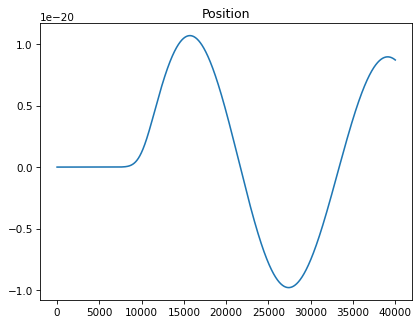

In [79]:
QMscheme1.expvalues('energy')


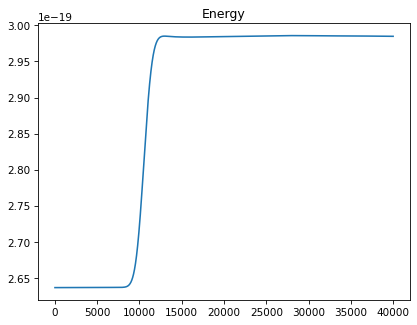

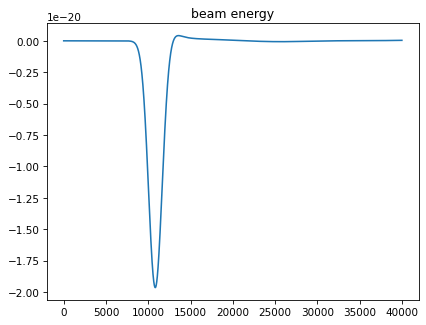

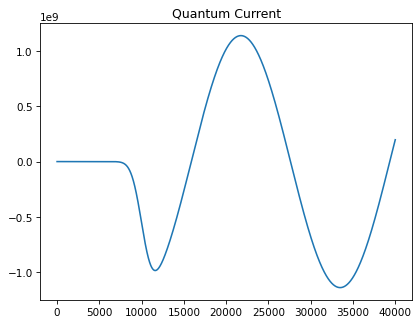

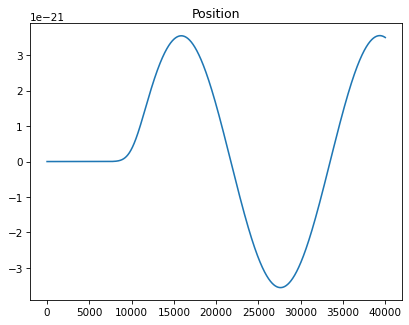

In [7]:
QMscheme2.expvalues('energy')
